<img src="https://raw.githubusercontent.com/codecaviar/digital_asset_management/master/assets/bingyune-and-company-logo-6400x3600.png" align="left" width="200" height="auto">

<br/><br/><br/><br/>

# The Usual Suspects: Where to Find Beautiful Evidence in Data

**BingYune Chen**, Principal Data Scientist<br>
2020-07-08 | 1 minute read

Data is provided by [IMDb](https://www.imdb.com/) 
    | Source code is on [Github](https://github.com/codecaviar)

---

The goal of this project is to provide a Do-It-Yourself Guide on the main hacking skills needed to create beautiful data visuals in Python. The guide focuses on the matplotlib library, which is the oldest and most widely-used Python library for data visualization.

## Table of Contents

1. [**Project Overview**](#overview)
2. [**Matplotlib Figure Anatomy**](#figure_anatomy)
3. [**Bar Graph**](#bar_graph)
4. [**Pie Chart**](#pie_chart)
5. [**Line Chart**](#line_chart)
6. [**Histogram Plot**](#histogram_plot)
7. [**Scatter Plot**](#scatter_plot)
8. [**Box Plot**](#box_plot)
9. [**Conclusion**](#conclusion)

<a class="anchor" id="overview"></a>
# 1. Project Overview

Data visualization is the graphical representation of information and data. Visualizations are the fastest way for humans to analyze and absorb information. Edward Tufte, one of the most prominent thinkers in the information design field, said, "The goal of information design is to convey the greatest number of ideas in the shortest time with the least ink in the smallest space." Tufte suggested four main principles of design: 1) show data (focus on the main goal); 2) use labels (but not too many); 3) avoid chartjunk (label some but not all data points); and 4) maximize data-ink (use color carefully and strategically). Data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data, with the creation of visual elements such as charts, graphs, and maps.

<a class="anchor" id="problem_statement"></a>
## 1.1 Problem Statement

> The goal of this project is to provide a Do-It-Yourself Guide on the main hacking skills needed to create beautiful data visuals in Python. 

Data visualizations in Python can be done using many different libraries. This guide will focus on the matplotlib library, which is the oldest and most widely-used Python library for data visualization. Matplotlib is designed to work with other Python libraries such as NumPy (a numerical mathematics library) and pandas (a "wrapper" for matplotlib). The project also makes use of data scraped from the Internet Movie Database [(IMDb)](https://www.imdb.com/), which is a collection of film information and reviews. The dataset contains more than 950 top-ranking movies from various genres. It also includes attribute values for title, data, duration, content rating, headlining actors, and ranking. 

In [1]:
# Import libraries for numpy and pandas
import numpy as np
import pandas as pd

# Import data from imdb_1000.csv and store it in a DataFrame named 'movie'
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


<a class="anchor" id="problem_statement"></a>
## 1.2 Lite Data Wrangling Steps

Data wrangling, sometimes referred to as data munging, is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time. 

Here is a [Quick Guide](https://www.bingyune.com/blog/heres-the-kicker-football) that offers step-by-step instructions in plain English about Data Wrangling.

In [2]:
# Convert the ratings of NOT RATED, APPROVED, PASSED, and GP to "UNRATED"
find_cont = ["NOT RATED","APPROVED","PASSED","GP"]
movies.content_rating = movies.content_rating.replace(find_cont,"UNRATED")

# Convert the ratings for X and TV-MA to 'NC-17'
find_cont = ['X','TV-MA']
movies.content_rating = movies.content_rating.replace(find_cont,'NC-17')

# Examine missing values, then fill them in with "reasonable" values
movies.content_rating.fillna(value="UNRATED", inplace=True)

# Check if there are multiple movies with the same title, and if yes, check if they are actually duplicates that need to be removed

# Passing False marks ALL duplicates, including the first occurrence
# We copy it since we'll be adding a column later
dups = movies[movies['title'].duplicated(False)].copy()

# For simplicity's sake we will leave the general case aside and 
# only test the durations field against a single movie per title
# (Otherwise, the solution may be rather lengthy).

# If each movie has a different duration, then they are not duplicates. 
# If they have the same durations, they may or may not be duplicates.

# First, we create a dict -- {title: duration of its first movie}
first_duration = dups.groupby('title').duration.agg('first').to_dict()

# Now, we create a new col that indicates if the movie's duration 
#    is the same as the first movie in the same genre
dups['same_duration'] = dups.apply(
    lambda row: int(first_duration[row.title] == row.duration), axis=1)

# Finally, the sum of the equal column per movie should be 1!
# dups.groupby('title')['same_duration'].sum() > 1

<a class="anchor" id="figure_anatomy"></a>
# 2. Matplotlib Figure Anatomy

Matplotlib is a 2-D plotting library that helps in visualizing figures. The figure below contains the overall window where plotting happens, contained within the figure are where actual graphs are plotted.

![Alt](./assets/fig1-matplotlib-figure-anatomy.png)

<span style='text-align: center; display: block'> Fig.1. Anatomy of a Figure, matplotlib provides standard chart elements in a potting window. Source: [matplotlib - Anatomy of a figure](https://matplotlib.org/gallery/showcase/anatomy.html) </span>

- **Title:** A description of the chart as a whole. If you’re at a loss, you can use the formula “y axis by x axis and legend.” >>>plt.title()
- **Major (and Minor) axis label:** The vertical or horizontal axis of the visualization that contains the values for that variable. >>>plt.xticks; plt.yticks
- **X (and Y) axis label:** The text box that contains the title of the axis (this is a separate item from the actual axis). >>>plt.xlabel; plt.ylabel
- **Legend:** The key that displays what the colors in the visualization represent. It’s best practice to only include a legend when there are multiple colors in your visualization.
- **Grid:** Reference lines that help the viewer better grasp the value of data points on the chart.
- **Line (line plot):** All data points of one color on a chart. Note: If you manually change the color of bars or points in a series after creating the chart, they still remain part of that same series.
- **Markers (scatter plot):** A single data point on a chart (a dot on a scatterplot, a bar on a bar chart, a slice of a pie chart, etc.).
- **Spines:** The rectangle that contains just the visualization (inside the chart area).
- **Figure:** The white space around the plot that contains the axis titles and chart title (it also contains the plot area).

In [3]:
# Install matplotlib >>> conda install -c conda-forge matplolib
import matplotlib.pyplot as plt # call the package module

# Setting styles 
plt.style.use('fivethirtyeight') # customize matplotlib with style sheets

# Display plots in Jupyter notebook (inline = static vs notebook = interactive)
%matplotlib inline 
# plt.show() # plotting from a python script 

# Save Figures to file
# plt.savefig('my_figure.png')
# plt.canvas.get_supported_filetypes()
"""
{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}
""";

# Use object-oriented interface (as opposed to MATLAB-style)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize(16,9)) 
# Figure is the outermost container for the Matplotlib plot(s)
# There can a single or multiple plots, called Axes, within a Figure 
# Each of these Axes contains the x and y-axis known as the Axis

<a class="anchor" id="bar_graph"></a>
# 3. Bar Graph

A type of graph used to show and compare the number, frequency, or other measure (e.g., mean) for different numerical and categorical data. Bar graphs are the most commonly used types of graph because they are simple to create and easy to interpret. A bar graph is generally used when at least one categorical variable (x axis) and at least one quantitative variable (y axis). The plot is also best for quickly displaying simple comparisons across categorical variables.

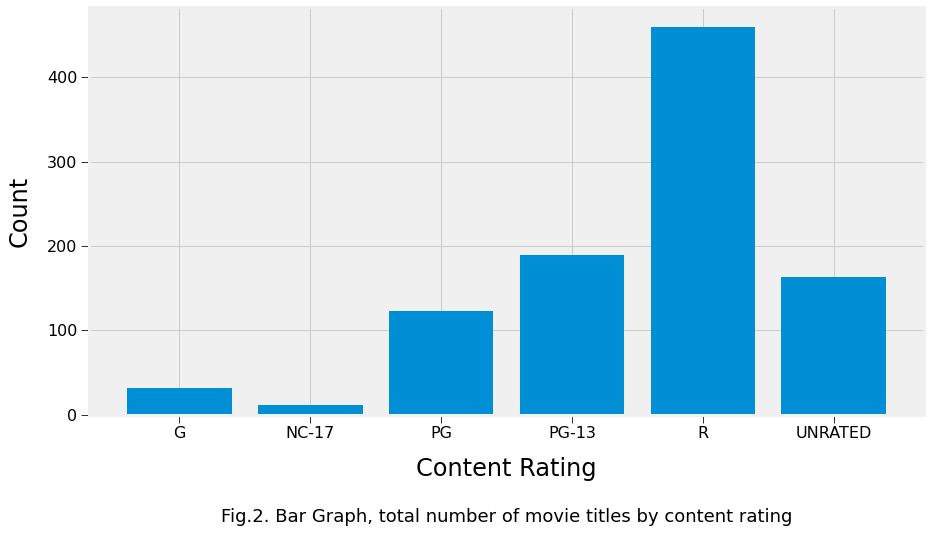

In [4]:
# Setup subplot
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(13.33, 7.5)) # default Axes = 1

# Define categories and counts
temp_df = movies[['content_rating', 'title']].groupby('content_rating').count()

# Get name for categories
x = list(temp_df.index)

# Get quantities for each category
y = list(temp_df.title.values)

# Create bar graph
ax.bar(x, y)

# Label plot >>> plt.rcParams.keys() to get complete list of keys
ax.set_xlabel('Content Rating', size=24, labelpad=16) # size adjusts font size
ax.set_ylabel('Count', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8) # labelsize adjusts font size

# Add caption
fignum = 2
figtxt = ". Bar Graph, total number of movie titles by content rating"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-bar-graph.png', bbox_inches='tight')

# Display the plot
plt.show();

<a class="anchor" id="pie_chart"></a>
# 4. Pie Chart

A pie chart displays information as a percentage of a whole (distribution of items within the same category). Pie charts should never be in 3D, as this can skew the data and confuse the audience.  

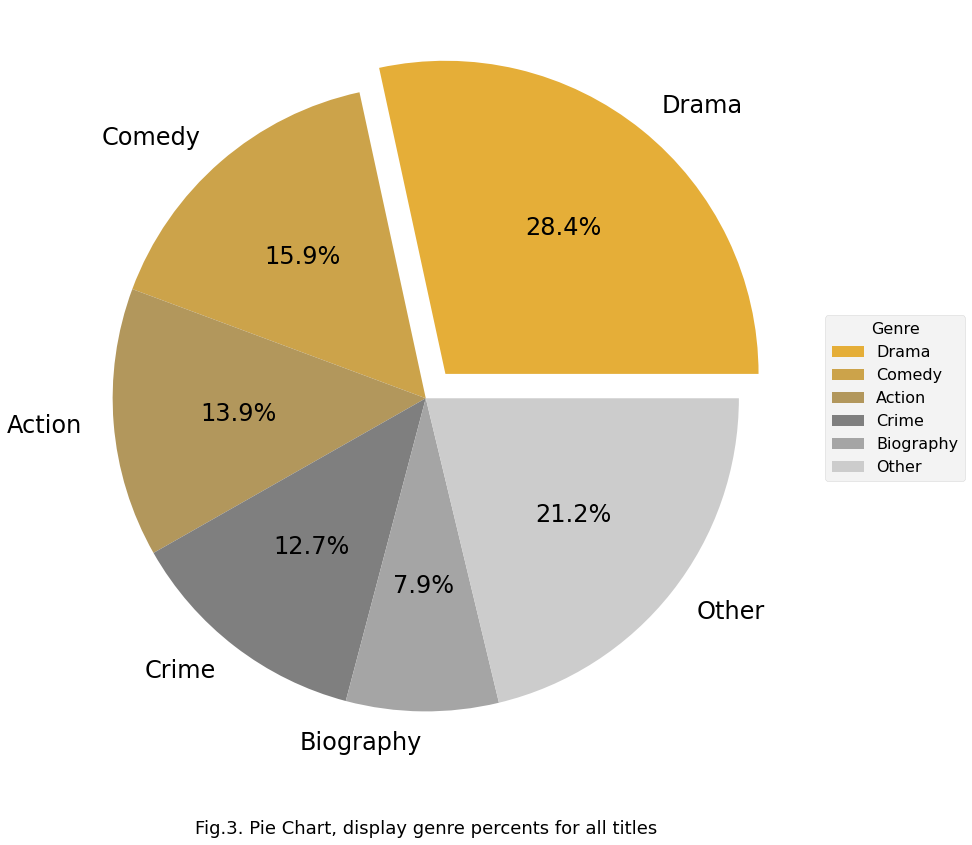

In [5]:
# Setup subplot
fig,ax = plt.subplots(figsize=(25.6, 14.4))

# Get dictionary of genre and total movies
total = len(movies)
top5_genre = list(movies.genre.value_counts().keys()[:5]) + ['Other']
top5_count = list(movies.genre.value_counts()[:5]) + [sum(list(movies.genre.value_counts()[5:]))]
data = [(x/total)*100 for x in top5_count] # focus on top 5
labels = [x for x in top5_genre]

# Create pie chart
autopct = '%0.1f%%' # print the values within the pie chart up to 1 decimal place
explode = [0.1]+[0]*5 # offset the first wedge
color = ['#E5AE38', '#CCA34A', '#B2975C', '#7F7F7F', '#A5A5A5', '#CCCCCC']
wedges, texts, autotexts = ax.pie(data, labels=labels, colors=color, autopct=autopct, 
                                  explode=explode, textprops={'fontsize': 24})

# Label plot >>> plt.rcParams.keys() to get complete list of keys
legend = ax.legend(wedges, labels, title='Genre', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=16)
plt.setp(autotexts, size=24)
plt.setp(legend.get_title(), fontsize=16)

# Add caption
fignum += 1
figtxt = ". Pie Chart, display genre percents for all titles"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.05, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-pie-chart.png', bbox_inches='tight')

# Display the plot
plt.show();

<a class="anchor" id="line_chart"></a>
# 5. Line Chart

The simplest of all plots is the visualization of a single function y=f(x). Also known as a line graph, the plot is used to visualize the value of something over time. The plot consists of at least two axes, x and y: The x axis represents independent variables, while data plotted to the y axis are dependent on x. The following example creates a line plot showing the familiar sine wave pattern on the y-axis across the x-axis with a consistent interval between observations.

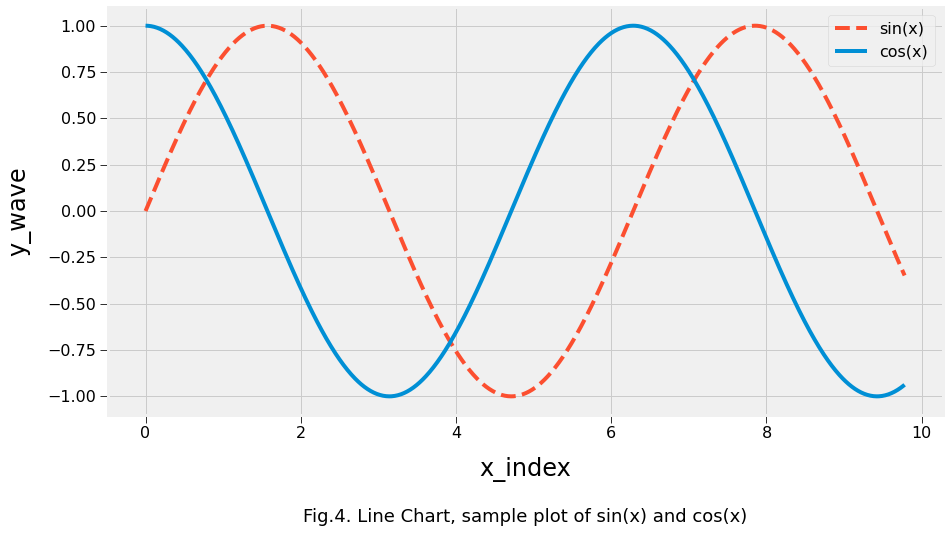

In [6]:
# Subplots returns a Figure and an Axes object
fig,ax = plt.subplots(figsize=(13.33, 7.5))

# Create consistent interval for x-axis
x = [x*0.01 for x in movies.index]

# Create function of x for y-axis
y = np.sin(x)

# Manipulate the first (and only Axes)
color = '#fc4f30' # specify color by Hex code, RGB tuple, grayscale, (rgbcmyk) code, or name
linestyle = 'dashed' # specify linestyle by keyword or code (-, --, -., :)
label = 'sin(x)' # specify plot labels for legend
ax.plot(x, y, color=color, linestyle=linestyle, label=label)
ax.plot(x, np.cos(x), color='#008fd5', linestyle='solid', label='cos(x)')

# Label plot >>> alternative to ax.set(...)
ax.set_xlabel('x_index', size=24, labelpad=16) # size adjusts font size
ax.set_ylabel('y_wave', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8) # labelsize adjusts font size
ax.legend(fontsize=16)

# Add caption
fignum += 1
figtxt = ". Line Chart, sample plot of sin(x) and cos(x)"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-line-chart.png', bbox_inches='tight')

# Display the plot
plt.show();

<a class="anchor" id="histogram_plot"></a>
# 6. Histogram Plot

A simple histogram can be a great first step in understanding a dataset. Histograms display the shape and spread of continuous data using bars of different heights: 1) Each bar groups numbers into ranges; and 2) Taller bars show that more data falls in that range. One of the issues with using a histogram as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features. 

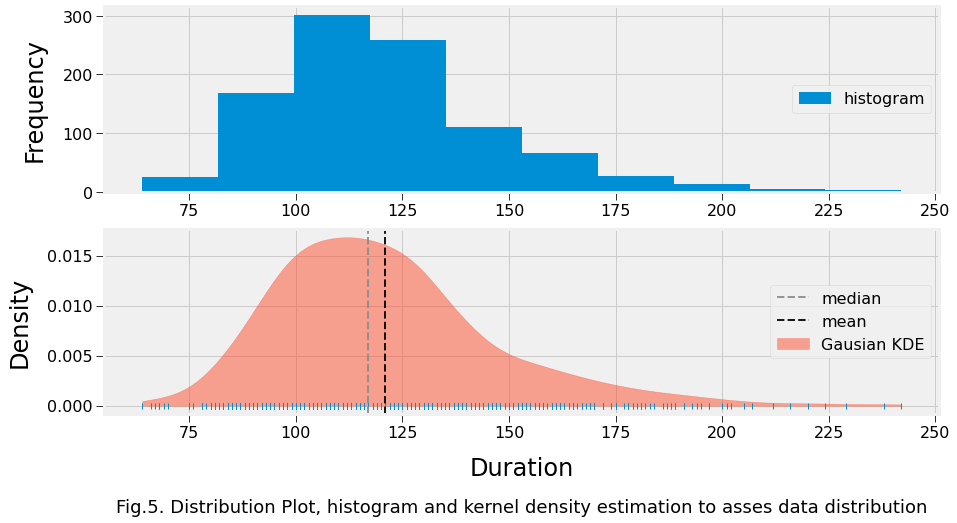

In [7]:
# Setup subplot
fig,ax = plt.subplots(2, figsize=(13.33, 7.5))

# Get series for movie duration
x = movies['duration']

# Create histogram
# https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
ax[0].hist(x, bins=10, label='histogram')

# Use Gaussian rule-of-thumb to attempt to find a nearly optimal smoothing length
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
from sklearn.neighbors import KernelDensity # as opposed to from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV, LeaveOneOut # use GridSearchCV to optimize bandwidth 
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(np.resize(x, (len(x), 1)))
kde = KernelDensity(bandwidth=list(grid.best_params_.values())[0], kernel='gaussian')
kde.fit(np.resize(x, (len(x), 1)))

xd = np.linspace(x.min(), x.max(), len(x))
logprob = kde.score_samples(np.resize(xd,(len(xd), 1))) # score_samples returns the log of the probability density

ax[1].fill_between(xd, np.exp(logprob), color='#fc4f30', label="Gausian KDE", alpha=0.5)
ax[1].plot(x, np.full_like(x, -0.1),'|', markeredgewidth=1)
ax[1].axvline(x.median(), color='#8b8b8b', linestyle='dashed',
            linewidth=2.0, label='median', alpha=0.9)
ax[1].axvline(x.mean(), color='black', linestyle='dashed',
            linewidth=2.0, label='mean', alpha=0.9)

# Label plots
ax[0].set_ylabel('Frequency', size=24, labelpad=16)
ax[1].set_ylabel('Density', size=24, labelpad=16)
ax[1].set_xlabel('Duration', size=24, labelpad=16)
ax[0].tick_params(axis='both', labelsize=16, length=8)
ax[1].tick_params(axis='both', labelsize=16, length=8)
ax[0].legend(loc='center right', fontsize=16)
ax[1].legend(loc='center right', fontsize=16)

# Add caption
fignum += 1
figtxt = ". Distribution Plot, histogram and kernel density estimation to asses data distribution"
figcap = "Fig." + str(fignum) + figtxt
ax[1].text(0.5, -0.5, figcap, fontsize=18, ha='center', va='center', transform=ax[1].transAxes)
plt.savefig('fig' + str(fignum) + '-histogram-plot.png', bbox_inches='tight')

# Display the plot
plt.show();

<a class="anchor" id="scatter_plot"></a>
# 7. Scatter Plot

A scatter plot is generated by mapping numeric values to a pair of perpendicular axes. Each dot represents a data point at the intersection of two attributes. Use scatter plots when you have two or more quantitative variables that can be broken down into "bins." The scatter plot is best for displaying the relationships between two quantitative variables. 

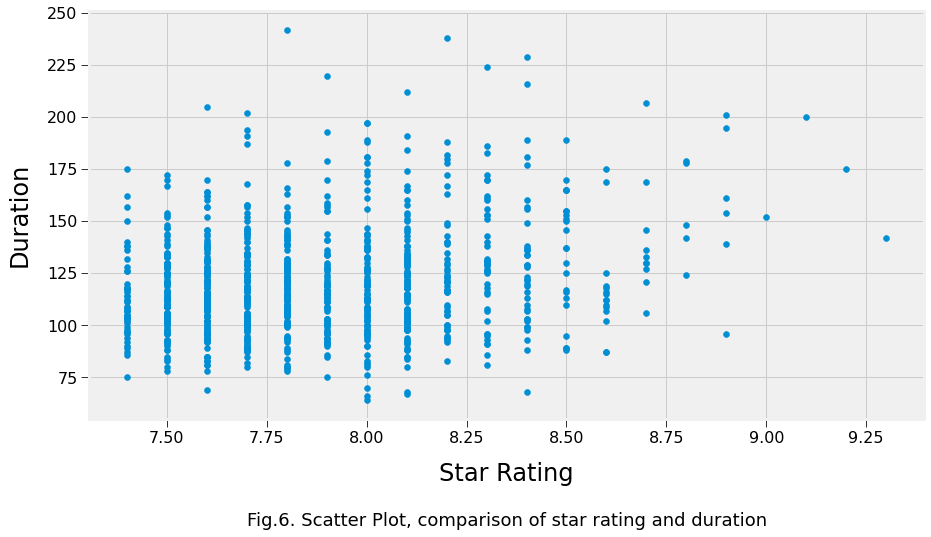

In [8]:
# Setup subplot
fig,ax = plt.subplots(figsize=(13.33, 7.5))

# Get series for star_rating
x = movies.star_rating

# Get series for movie duration
y = movies.duration

# Create scatter plot 
ax.scatter(x, y) # optional c=colors and s=sizes for additional properties

# Label plots
ax.set_xlabel('Star Rating', size=24, labelpad=16)
ax.set_ylabel('Duration', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, size=8)

# Add caption
fignum += 1
figtxt = ". Scatter Plot, comparison of star rating and duration"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-scatter-plot.png', bbox_inches='tight')

# Display the plot
plt.show();

<a class="anchor" id="box_plot"></a>
# 8. Box Plot

A box and whisker plot, or box plot for short, is used to summarize the distribution of a data sample - especially when the data has unknown or unusual distribution. The x-axis is used to represent the data sample, while the y-axis is used to represent the observation values. A box is drawn to summarize the middle 50% of the dataset starting at the 25th percentile and ending at the observation at the 75th percentile (i.e. interquartile range or IQR). The median (50th percentile) is drawn with a line. Additional lines called whiskers are drawn extending from both ends of the box (i.e. 1.5xIQR) to demonstrate the expected range of values in the distribution. Possible outliers (observations outside of the whiskers) are drawn with small circles.  

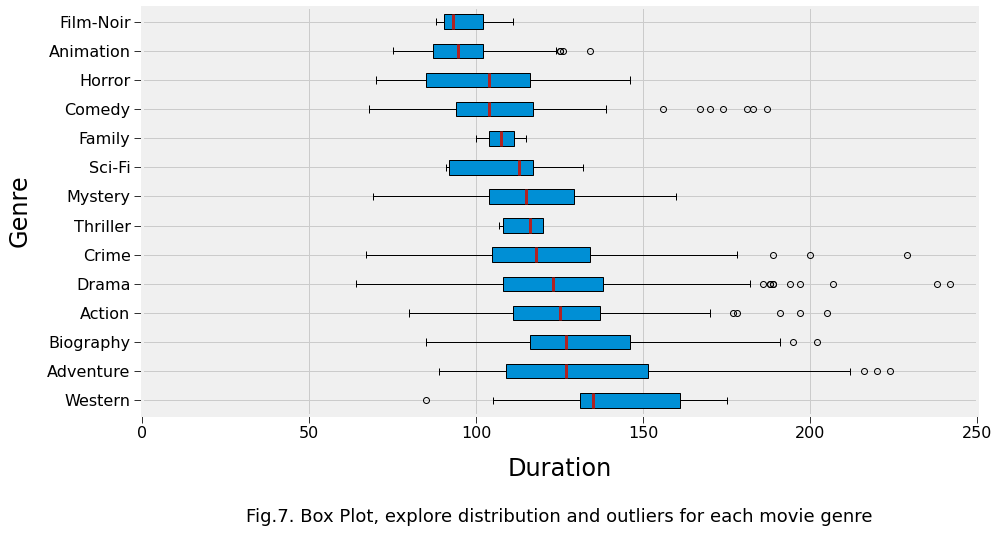

In [9]:
# Setup subplots
fig,ax = plt.subplots(figsize=(13.33, 7.5))

# Get series of duration by genre
temp_data = {}
for i in movies['genre'].unique():
    if len(movies[movies['genre'] == i].duration) > 1:
        temp_data[i] = movies[movies['genre'] == i].duration
    else:
        continue
sort_temp = sorted(temp_data.items(), key=lambda x: x[1].median(), reverse=True)
genre, duration = zip(*sort_temp) # *zipped_list unpacks the object

# Create box plot
medianprops = dict(linestyle='-', linewidth=3, color='firebrick')
ax.boxplot(duration, vert=0, labels=genre,
           patch_artist=1, medianprops=medianprops)

# Label plots
ax.set_xlabel('Duration', size=24, labelpad=16)
ax.set_ylabel('Genre', size=24, labelpad=16)
ax.set_xlim(0, 250)
ax.tick_params(axis='both', labelsize=16, size=8)

# Add caption
fignum += 1
figtxt = ". Box Plot, explore distribution and outliers for each movie genre"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.25, figcap, fontsize=18, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-box-plot.png', bbox_inches='tight')

# Display the plot
plt.show();

<a class="anchor" id="conclusion"></a>
# 9. Conclusion

Data visualization is one type of visual art that peaks our interest and focuses our eyes on the message. As humans, if we can see something, we internalize it quickly. It’s storytelling with a purpose. Thus, the better you can tell a story with data, whether in a dashboard or on chart in a slide deck, the better you can leverage the information to make good decisions. Here are three best practices for storytelling with data:

1. **Rewrite the problem statement or hypothesis.** This is your problem statement or hypothesis, reworded in a way that makes sense to your audience (hence, why it’s important to understand who they are and what they want).
    
2. **Present the conclusion or result of your analysis** and how it addressed the original problem. Paint a picture of what the “world” is like before your analysis. This is the “Once upon a time...” part; the “In a world...” part. Every story needs a hero. Who/what is impacted? How can they help you explain your data better than numbers can? The results of the analysis and your action-oriented recommendation.
    
3. **Connect the dots/next steps.** What happened (aka, your data analysis). Be careful not to get caught up in detailing every step of your workflow. Of course, it all feels important to you — just remember who you’re talking to and what matters to your audience.

<a class="anchor" id="Acknowledgments"></a>
### Acknowledgments 

The project referenced the following resources:
* https://chrisalbon.com/#python
* https://jakevdp.github.io/PythonDataScienceHandbook/index.html
* https://machinelearningmastery.com/data-visualization-methods-in-python/

---
<em>The Code Caviar</em> is a digital magazine about data science and analytics that dives deep into key topics, so you can experience the thrill of solving at scale. 